<a href="https://colab.research.google.com/github/dcgkpindia/DeepLearning/blob/main/Notebooks/GraduateAdmissionPredictionusingANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> <b> Graduate Admission Prediction </b></center>

In [1]:
import pandas as pd
import numpy as np

## Read the dataset

https://www.kaggle.com/code/campusx/gre-admission-prediction/input?select=Admission_Predict_Ver1.1.csv

In [3]:
df = pd.read_csv("/content/Admission_Predict_Ver1.1.csv")

## Check the shape and other details

In [4]:
df.shape

(500, 9)

In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


## Let us Explore and explain the data set



1.   Serial No. - This column in unique to each row. Will not be of any help in investigation and prediction.
2.   GRE Score - This is the Gre score of exam.
3.   TOEFL Score - This is another exam score.
4.   University Rating - It seems it is the rating of Univesity where the student studied
5.   SOP - This is also a continous variable
6.   LOR - This seems a continous variable
7.   CGPA - It is a score
8.   Research - A Boolean Value
9.   Chance of Admit - Is a Continous value



In [10]:
df.duplicated().sum()

0

We will have to scale the values. We will use MinMax scaler and not standard scaler as it is said that we should use min max scaler when we know the upper bound and lower bound of the variable.

## Drop the Serial No. column as this is not adding any value and indicates only the row number of the data.

In [11]:
df.drop(columns=['Serial No.'], inplace = True)

In [13]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [14]:
X=df.iloc[:,0:-1]
y=df.iloc[:, -1]

In [15]:
print("The shape of X is now : ", X.shape)
print("The shape of y is now : ", y.shape)

The shape of X is now :  (500, 7)
The shape of y is now :  (500,)


In [16]:
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [17]:
print("The shape of X_train is: ", X_train.shape)
print("The shape of X_test is : ", X_test.shape)
print("The shape of y_train is: ", y_train.shape)
print("The shape of y_test is: ", y_test.shape)

The shape of X_train is:  (400, 7)
The shape of X_test is :  (100, 7)
The shape of y_train is:  (400,)
The shape of y_test is:  (100,)


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [30]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim = 7))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation = 'linear'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss = 'mean_squared_error', optimizer = 'Adam')

In [37]:
history = model.fit(X_train_scaled, y_train, epochs = 200, validation_split=0.2)

Epoch 1/200
10/10 [==============================] - 0s 16ms/step - loss: 0.0061 - val_loss: 0.0058
Epoch 2/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0060 - val_loss: 0.0057
Epoch 3/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0060 - val_loss: 0.0056
Epoch 4/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0059 - val_loss: 0.0055
Epoch 5/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0058 - val_loss: 0.0054
Epoch 6/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0058 - val_loss: 0.0054
Epoch 7/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0057 - val_loss: 0.0053
Epoch 8/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0056 - val_loss: 0.0052
Epoch 9/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0056 - val_loss: 0.0051
Epoch 10/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0055 - val_loss: 0.0051
Epoch

In [38]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 4ms/step


In [39]:
from sklearn.metrics import r2_score

In [40]:
r2_score(y_test, y_pred)

0.8143067026560327

In [41]:
import matplotlib.pyplot as plt

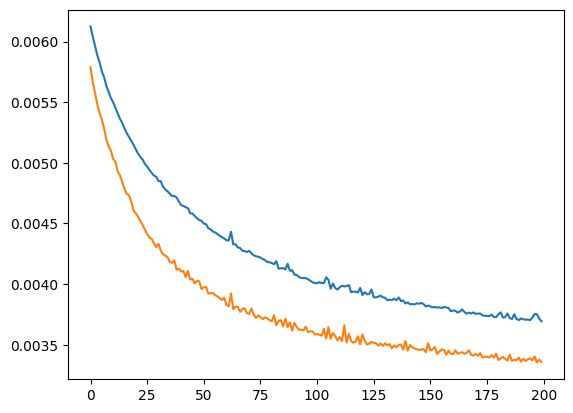

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])